In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
df = pd.read_csv('concrete.csv')

In [25]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [26]:
df.shape

(1030, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [28]:
X = df.drop(['CompressiveStrength'], axis=1)

In [29]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [30]:
y = df['CompressiveStrength']

In [31]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[8]),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

c:\Users\DJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [33]:
history = model.fit(
    X, y,
    batch_size = 128,
    epochs = 200,
)

Epoch 1/200


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 60.6876
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.0947 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.4740 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.3135 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4356 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.3393 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9352 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0492 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.9122 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3705 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1611 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5707 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2852 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.2099
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3209 
Epoch 16/200
9/9 ━━━━━━━

<Axes: >

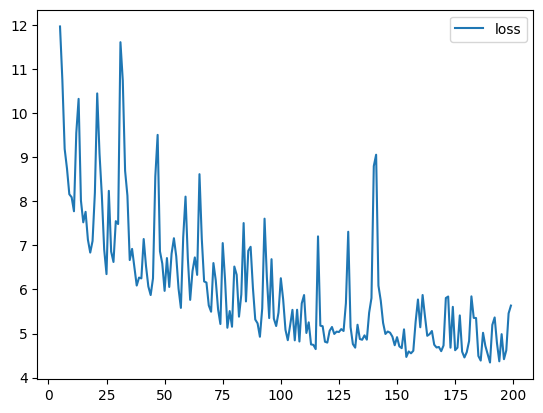

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot()